# 4. PyTorch Custom datasets

## 0. Importing PyTorch and setting up device-agnostic code


In [2]:
import torch
from torch import nn

# Check version of PyTorch
torch.__version__

'2.0.0+cu117'

In [4]:
# Setup device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 1. Get data

Our dataset is a subset of the Food101 dataset.

We will take only 3 classes of food and only 10% of the images (~75 training, 25 testing images).

When staring out ML projects, it's important to try things on a small scale and then increase the scale when necessary.

In [12]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print(f"Downloading pizza, steak and sushi data...")
    f.write(request.content)

# Unzip pizza, steak and sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print(f"Unziping pizza, steak and sushi data...")
    zip_ref.extractall(image_path)

# Remove zip file
Path.unlink(data_path / "pizza_steak_sushi.zip")

data/pizza_steak_sushi directory already exists... skipping download
Unziping pizza, steak and sushi data...


## 2. Becoming one with the data (data preparation and data exploration)

In [13]:
import os 

def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents."""
    
    for dirpath, dirnames, filenamse in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenamse)} images in '{dirpath}'.")

In [15]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [16]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing an image

1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image with PIL
5. We'll then show the image and print metadata

Random image path: data/pizza_steak_sushi/train/pizza/2493954.jpg
Image class: pizza
Image height: 512
Image width: 512


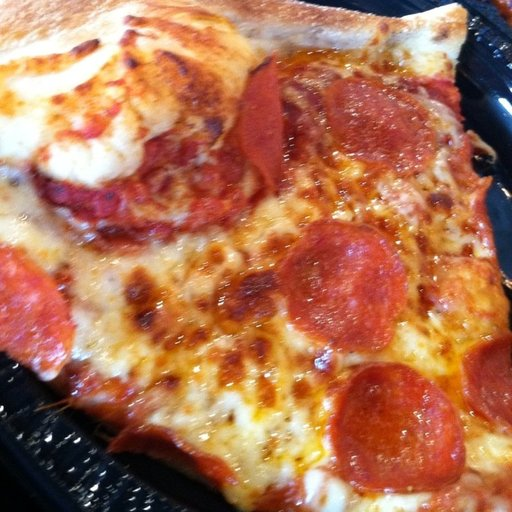

In [76]:
import random
from PIL import Image

# Set seed
# random.seed(100)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get the image class name
random_image_class = random_image_path.parent.stem

# 4. Open image using PIL
img = Image.open(random_image_path)

# 5. Show image and print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {random_image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

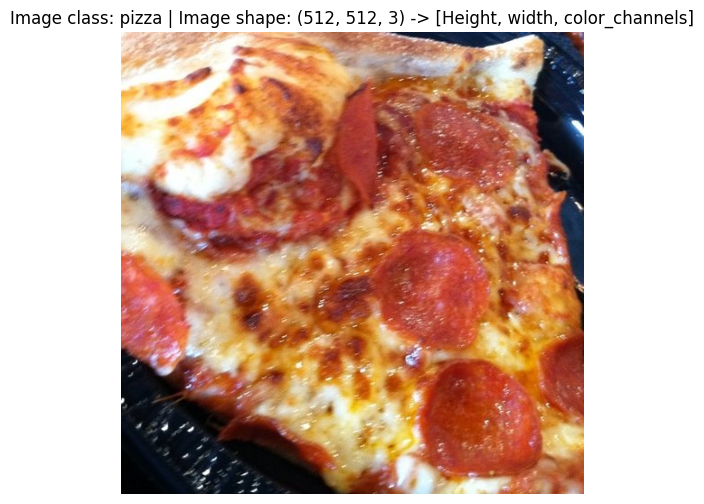

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib

plt.figure(figsize=(12,6))
plt.imshow(img_as_array)
plt.title(f"Image class: {random_image_class} | Image shape: {img_as_array.shape} -> [Height, width, color_channels]")
plt.axis(False)